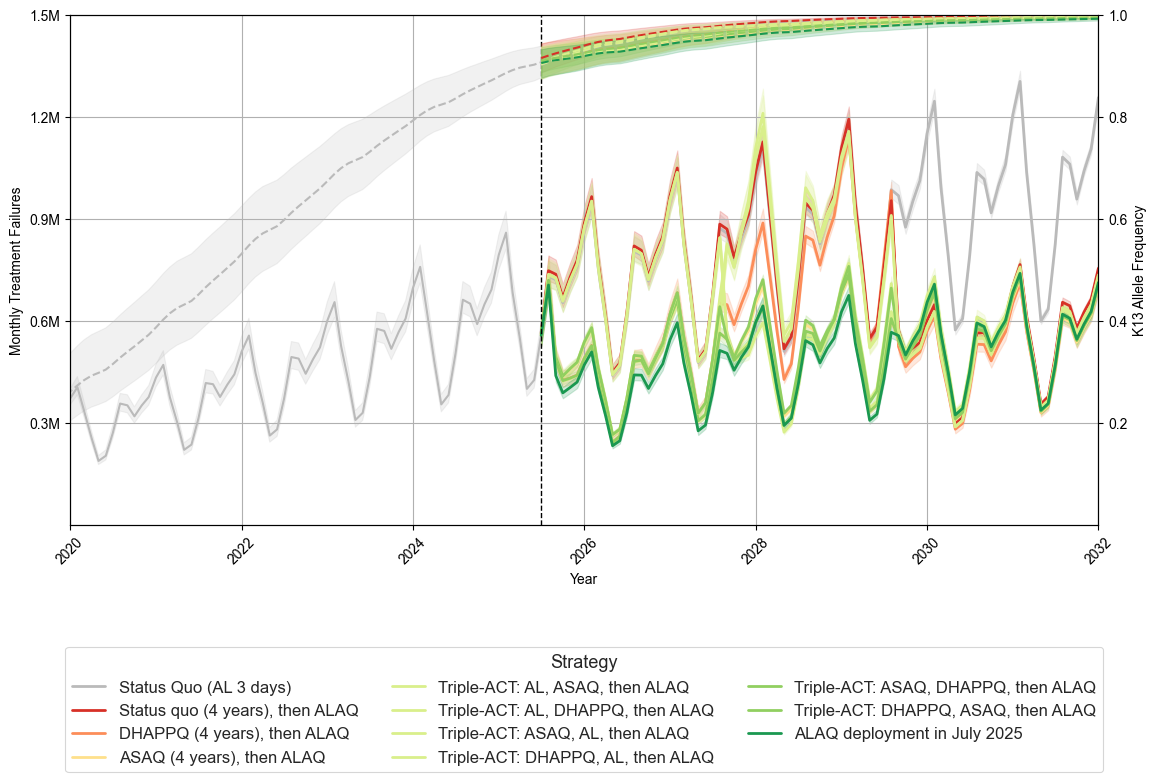

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.lines import Line2D
import pandas as pd

# Load data
df = pd.read_csv("./data/fig7_data.csv", parse_dates=["date"])
critical_point = pd.to_datetime("2025-07-01")

# Formatter for millions
def millions_formatter(x, pos):
    return f'{x * 1e-6:.1f}M'

# Colors
cold_color = '#bababa'
palette_after = {
    "status_quo": "#bababa",
    "tact_dhappq4y_alaq": "#fc8d59",
    "tact_al4y_alaq": "#d73027", 
    "tact_asaq4y_alaq": "#fee08b", 
    "tact_al_asaq_alaq": "#d9ef8b", 
    "tact_al_dhappq_alaq": "#d9ef8b", 
    "tact_asaq_al_alaq": "#d9ef8b",  
    "tact_dhappq_al_alaq": "#d9ef8b", 
    "tact_dhappq_asaq_alaq": "#91cf60", 
    "tact_asaq_dhappq_alaq": "#91cf60",  
    "tact_alaq": "#1a9850",
}

# Scenario labels for legend
scenario_labels = {
    "status_quo": "Status Quo (AL 3 days)",
    "tact_al4y_alaq": "Status quo (4 years), then ALAQ",
    "tact_dhappq4y_alaq": "DHAPPQ (4 years), then ALAQ",
    "tact_asaq4y_alaq": "ASAQ (4 years), then ALAQ",
    "tact_al_asaq_alaq": "Triple-ACT: AL, ASAQ, then ALAQ",
    "tact_al_dhappq_alaq": "Triple-ACT: AL, DHAPPQ, then ALAQ",
    "tact_asaq_al_alaq": "Triple-ACT: ASAQ, AL, then ALAQ",
    "tact_dhappq_al_alaq": "Triple-ACT: DHAPPQ, AL, then ALAQ",
    "tact_asaq_dhappq_alaq": "Triple-ACT: ASAQ, DHAPPQ, then ALAQ",
    "tact_dhappq_asaq_alaq": "Triple-ACT: DHAPPQ, ASAQ, then ALAQ",
    "tact_alaq": "ALAQ deployment in July 2025",
}

# Setup figure
fig, ax1 = plt.subplots(figsize=(12, 10))
ax2 = ax1.twinx()

sns.set_context("paper", font_scale=2)
sns.set_style("whitegrid")

# Split data into pre- and post-policy change
pre = df[df["date"] <= critical_point]
post = df[df["date"] >= critical_point]

# Plot pre-policy data
sns.lineplot(data=pre, x="date", y="total_treatmentfailures", ax=ax1,
             color=cold_color, lw=1.5, errorbar=("pi", 90))
sns.lineplot(data=pre, x="date", y="k13_frequency", ax=ax2,
             color=cold_color, lw=1.5, linestyle='--', errorbar=("pi", 90))

# Plot post-policy data by scenario
for scenario in df["scenario"].dropna().unique():
    data_post = post[post["scenario"] == scenario]
    if scenario in palette_after:
        sns.lineplot(data=data_post, x="date", y="total_treatmentfailures", ax=ax1,
                     color=palette_after[scenario], lw=2, errorbar=("pi", 90))
        sns.lineplot(data=data_post, x="date", y="k13_frequency", ax=ax2,
                     color=palette_after[scenario], lw=1.5, linestyle='--', errorbar=("pi", 90))

# Vertical policy line
ax1.axvline(critical_point, color='black', linestyle='--', lw=1)

# Axis formatting
# Left Y-axis (Treatment Failures)
ax1.set_ylabel("Monthly Treatment Failures")
ax1.set_ylim([0, 1.5e6])
left_yticks = [0.3e6 * i for i in range(1, 6)]  # [0.3e6, 0.6e6, ..., 1.5e6]
ax1.set_yticks(left_yticks)
ax1.yaxis.set_major_formatter(millions_formatter)

# Right Y-axis (K13 Frequency)
ax2.set_ylabel("K13 Allele Frequency")
ax2.set_ylim([0, 1.0])
right_yticks = [round(0.2 * i, 1) for i in range(1, 6)]  # [0.2, 0.4, ..., 1.0]
ax2.set_yticks(right_yticks)
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f"{x:.1f}"))


# X-axis formatting
ax1.set_xlim(pd.to_datetime("2020-01-01"), pd.to_datetime("2032-01-01"))
ax1.set_xlabel("Year")
ax1.xaxis.set_major_locator(mdates.YearLocator(2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, axis='both')
ax2.grid(False)

# Legend
custom_handles = [
    Line2D([0], [0], color=palette_after[key], lw=2)
    for key in scenario_labels if key in palette_after
]

ax1.legend(custom_handles, [scenario_labels[k] for k in scenario_labels if k in palette_after],
           title="Strategy", loc='lower center', bbox_to_anchor=(0.5, -0.5),
           ncol=3, fancybox=True, frameon=True, fontsize=12, title_fontsize=13)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig("figure_7.png", dpi=300, bbox_inches='tight')
plt.show()
